<a href="https://colab.research.google.com/github/marinanastas/telegrams/blob/main/code/shannons_enthropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Данный код предназначен для проверки первой гипотезы, от основного метода отличается тем, что при вычислении разнообразия тем мы нормализуем данные с помощью меры энтропии Шеннона

## Загрузка данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import scipy.stats as sts

In [ ]:
fname = '/content/drive/MyDrive/___МАГИСТРАТУРА/телеграммы/TELEGRAMMA/python/БД все телеграммы_1.xlsx'
df = pd.read_excel(fname)

## Присвоение каждой телеграмме десятилетия (код также описан в программе, проверяющей первую гипотезу, и полностью повторяет её строение)

In [ ]:
def decade(date):
  if len(date.split('.')) !=3:
      year = 'xxxx'
  else:
      year = date.split('.')[2][:3]
  return year

In [ ]:
df['decade'] = df['date'].apply(decade)

In [ ]:
def nonans(t):
  if type(t) is float:
    t = 'нет данных'
  return t

In [ ]:
decthem = df[['decade', 'theme']]
decthem['theme_corr'] = decthem['theme'].apply(nonans)
themes = decthem['theme_corr']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
topics = []
for theme in themes:
  theme = str(theme).split(', ')
  for t in theme:
    if t not in topics:
      topics.append(t)
for topic in topics:
  tt = []
  for theme in themes:
    if topic in theme:
      tt.append(1)
    else:
      tt.append(0)
  decthem[topic] = tt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
results = decthem[topics].groupby(decthem['decade']).sum()

In [ ]:
results = results.transpose()

## Подсчёт энтропии Шеннона

In [ ]:
def shannons_entropy(data):
  pd_series = pd.Series(data)
  counts = pd_series.value_counts()
  entropy = sts.entropy(counts)
  #print(entropy)
  return(entropy)

In [ ]:
dc = {}
X = []
Y = []
for column in results.columns:
  a = []
  for topic in topics:
    i = 0 
    n = results[column][topic] 
    if n > 0:
      while i < n:
        a.append(topic)
        i+=1
  #dc[column] = shannons_entropy(a)
  X.append(column)
  Y.append(shannons_entropy(a))
  #print(a)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

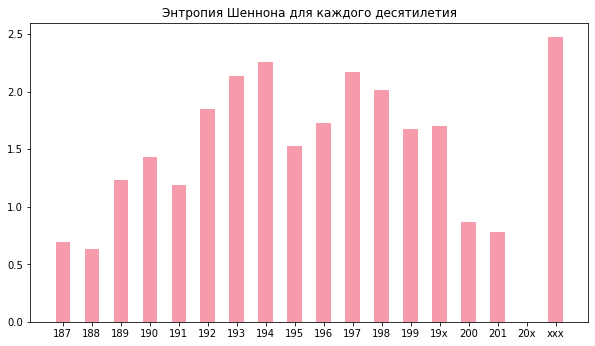

In [ ]:
plt.rcParams["figure.figsize"] = (10,5.5)
fig, ax = plt.subplots()
ax.bar(X,Y, width = 0.5, color = '#F69BAC')
ax.set_title('Энтропия Шеннона для каждого десятилетия')
fig.show()
plt.savefig('/content/drive/MyDrive/___МАГИСТРАТУРА/телеграммы/TELEGRAMMA/python/shannon')